<a href="https://colab.research.google.com/github/PranavReddyy/Labs-IIITH/blob/main/%5B4%5D_AIML_Module_01_Lab_02_Machine_Learning_terms_and_metrics_%26_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 1, Lab 2**
# **Machine Learning terms and metrics & Data Augmentation**

# Section 1 - Machine Learning terms and metrics

In this section, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like : \\
1. MedInc        : median income in block group
2. HouseAge      : median house age in block group
3. AveRooms      : average number of rooms per household
4. AveBedrms     : average number of bedrooms per household
5. Population    : block group population
6. AveOccup      : average number of household members
7. Latitude      : block group latitude
8. Longitude     : block group longitude \\

**Task : To predict the cost of the houses per district**

We use ```scikit-learn``` library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

In [153]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [ ]:
dataset = datasets.fetch_california_housing()
# Dataset Description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Given below are the list of target values.

These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity.

We need to just round off the values to the nearest integer and use a classification model to predict the house value.

In [154]:
print("Original target values : ", dataset.target)

# Rounding Off
dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Original target values :  [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


The simplest model to use for classification is the K-Nearest Neighbors Model. We will use this model to predict the house with a K-Value of 1. We will also use the accuracy metric to evaluate the model.

In [155]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    ) # Difference bw features. Numpy automatically takes care of the size here, (As it is lower) -> (It is more close) -> (Imagine this as a representation for a data being as close as possible with any other possible data)
    sq = diff * diff # Square the differences (To keep it positive)
    dist = sq.sum(1) # Add up the squares
    label = trainlabel[np.argmin(dist)]
    return label

def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [156]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the random classifier algorithm

    In reality, we don't need these arguments but we are passing them to keep the function signature consistent with other classifiers

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is a random label from the training data
    """

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is.

$ Accuracy = \frac{number \ of \ correctly \ classified \ samples}{total \ number \ of \ samples} $

The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [157]:
def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [158]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [159]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [160]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

What is the accuracy of our classifiers on the train dataset?

In [161]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.4375808538163 %


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [162]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.10852713178294 %
Validation accuracy using random classifier: 16.884689922480618 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [163]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.048257372654156 %


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [164]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 34.91795366795367 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
  - Larger Validation Size : If too large, the training set might become too small, reducing the model's learning effectiveness.
  - Smaller Validation Size : If it’s too small, it may not represent the dataset accurately, leading to unreliable accuracy estimates


2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
  - Large Training Size, Small Validating Size : Limited learning data, thereby lowering validation accuracy.
  - Smaller traning size : Validation accuracy is less aligned, fluctuating more


In [165]:
# Collecting validation accuracies
val_accuracies_nn = []
val_accuracies_rc = []
labels = []

In [166]:
# Increasing validation set -> Decreasing Training set
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 0.1 / 100
)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("(Train: 0.1, Val: 99.9) : ", valAccuracy*100, "%")
val_accuracies_nn.append(valAccuracy * 100)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("(Train: 0.1, Val: 99.9) : ", valAccuracy*100, "%")
val_accuracies_rc.append(valAccuracy * 100)
labels.append("Increased Validation")

# Decreasing validation set -> Increasing Training set
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 99.9 / 100
)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("(Train: 99.9, Val: 0.1) : ", valAccuracy*100, "%")
val_accuracies_nn.append(valAccuracy * 100)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("(Train: 99.9, Val: 0.1) : ", valAccuracy*100, "%")
val_accuracies_rc.append(valAccuracy * 100)
labels.append("Decreased Validation")

(Train: 0.1, Val: 99.9) :  25.605242400339783 %
(Train: 0.1, Val: 99.9) :  15.247861173472483 %
(Train: 99.9, Val: 0.1) :  42.857142857142854 %
(Train: 99.9, Val: 0.1) :  14.285714285714285 %


3. What do you think is a good percentage to reserve for the validation set so that these two factors are balanced?
  - 20-30%
    - Enough data in the training set
    - Not too much which would reduce model learnings potential
    - Ensures validation set is large enough


In [167]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100
)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("(Train: 75, Val: 25) (NN) : ", valAccuracy*100, "%")
val_accuracies_nn.append(valAccuracy * 100)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("(Train: 75, Val: 25) (RC) : ", valAccuracy*100, "%")
val_accuracies_rc.append(valAccuracy * 100)
labels.append("Train: 75, Val: 25")

(Train: 75, Val: 25) (NN) :  33.58629130966953 %
(Train: 75, Val: 25) (RC) :  16.474908200734394 %


Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

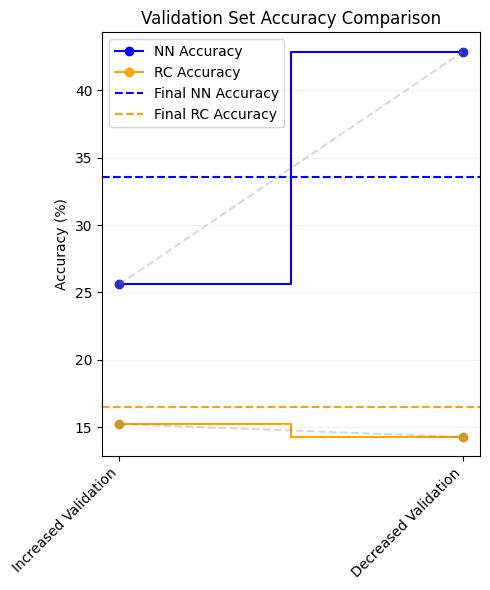

In [168]:
# Prepare data for plotting
# x positions should match the number of accuracy entries
x = np.arange(len(labels))  # x positions for the labels, including all entries

# Plotting
plt.figure(figsize=(5, 6))

# Nearest Neighbour Classifier Step Plot (including all accuracies)
plt.step(x[:-1], val_accuracies_nn[:-1], label='NN Accuracy', where='mid', marker='o', color='blue')
plt.plot(x[:-1], val_accuracies_nn[:-1], 'o--', color='grey', alpha=0.3)

# Random Classifier Step Plot (including all accuracies)
plt.step(x[:-1], val_accuracies_rc[:-1], label='RC Accuracy', where='mid', marker='o', color='orange')
plt.plot(x[:-1], val_accuracies_rc[:-1], 'o--', color='grey', alpha=0.3)

# Adding horizontal lines for the last accuracy values
# These should be the last values of the accuracies, which should match the last tick positions.
nn_val_accuracy = val_accuracies_nn[-1]  # Last accuracy for NN
rc_val_accuracy = val_accuracies_rc[-1]  # Last accuracy for RC

# Get the last index for horizontal line placement
last_index = len(labels) - 1

plt.axhline(y=nn_val_accuracy, color='blue', linestyle='--', label='Final NN Accuracy', xmin=0, xmax=1)
plt.axhline(y=rc_val_accuracy, color='orange', linestyle='--', label='Final RC Accuracy', xmin=0, xmax=1)

# Setting the x-ticks to match the labels
plt.xticks(x[[0,1]], [labels[i] for i in [0,1]], rotation=45, ha='right')
plt.ylabel('Accuracy (%)')
plt.title('Validation Set Accuracy Comparison')
plt.grid(axis='y', color='0.95')
plt.legend()
plt.tight_layout()
plt.show()

> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

In [169]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x, y = dataset.data, dataset.target
low = np.quantile(y, 0.33)
high = np.quantile(y, 0.67)

y_binned = np.where(y <= low, 0, np.where(y <= high, 1, 2))

# 1-NN Classifier
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(traindata, trainlabel)
accuracy_1 = accuracy_score(testlabel, knn_1.predict(testdata))
print("Accuracy of 1-NN classifier on test set:", accuracy_1)

# 3-NN Classifier
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(traindata, trainlabel)
accuracy_3 = accuracy_score(testlabel, knn_3.predict(testdata))
print("Accuracy of 3-NN classifier on test set:", accuracy_3)

Accuracy of 1-NN classifier on test set: 0.34025096525096526
Accuracy of 3-NN classifier on test set: 0.35135135135135137


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>cross-validation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [170]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """
    This function takes in the data, labels, split percentage, number of iterations and classifier function
    and returns the average accuracy of the classifier

    alldata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    alllabel: numpy array of shape (n,) where n is the number of samples
    splitpercent: float which is the percentage of data to be used for training
    iterations: int which is the number of iterations to run the classifier
    classifier: function which is the classifier function to be used

    returns: the average accuracy of the classifier
    """
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [171]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 34.01016548665067 %
Test accuracy: 34.91795366795367 %


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100
)

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
  - Yes theoretically it should, averaging validation accuracy across multiple splits helps smooth out variations caused by any single data split, leading to more consistent and reliable accuracy results.

In [172]:
def validate_once(data, labels, splitpercent, classifier):
    traindata, trainlabel, valdata, vallabel = split(data, labels, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    return Accuracy(vallabel, valpred)

first1_run_acc = validate_once(traindata, trainlabel, 0.75, classifier=NN)
second2_run_acc = validate_once(traindata, trainlabel, 0.75, classifier=NN)
multi_run_acc = AverageAccuracy(traindata, trainlabel, 0.75, 10, classifier=NN)

print("First validation accuracy:", first1_run_acc * 100, "%")
print("Second validation accuracy:", second2_run_acc * 100, "%")
print("Average validation accuracy across splits:", multi_run_acc * 100, "%")

First validation accuracy: 33.054393305439326 %
Second validation accuracy: 34.95908346972177 %
Average validation accuracy across splits: 33.686868804381945 %


2. Does it give more accurate estimate of test accuracy?
  - Theoretically it does becuase it reduces the impact of random data partitioning.
  - But we dont observe that here, have to see why

In [ ]:
single_run_val_acc = validate_once(traindata, trainlabel, 0.75, classifier=NN)
multi_run_val_acc = AverageAccuracy(traindata, trainlabel, 0.75, 10, classifier=NN)

# Calculate actual test accuracy
testpred = NN(alltraindata, alltrainlabel, testdata)
actual_test_acc = Accuracy(testlabel, testpred)

print("Single split validation accuracy estimate:", single_run_val_acc * 100, "%")
print("Average validation accuracy estimate:", multi_run_val_acc * 100, "%")
print("Actual test accuracy:", actual_test_acc * 100, "%")

Single split validation accuracy estimate: 33.77483443708609 %
Average validation accuracy estimate: 33.309177426031546 %
Actual test accuracy: 34.455205811138015 %


3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
  - Yes theoretically, increasing the number of iterations generally provides a better (more stable) estimate

In [ ]:
# Calculate validation accuracy with fewer iterations (e.g., 3)
low_iter_acc = AverageAccuracy(alltraindata, alltrainlabel, 0.75, 3, classifier=NN)

# Calculate validation accuracy with higher iterations (e.g., 20)
high_iter_acc = AverageAccuracy(alltraindata, alltrainlabel, 0.75, 20, classifier=NN)

print("Validation accuracy with fewer iterations:", low_iter_acc * 100, "%")
print("Validation accuracy with higher iterations:", high_iter_acc * 100, "%")

Validation accuracy with fewer iterations: 33.9059670648425 %
Validation accuracy with higher iterations: 34.27459115691528 %


 4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

In [173]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 10 / 100
)
smalltrainnn = AverageAccuracy(alltraindata, alltrainlabel, 0.75, 3, classifier=NN)
smalltrainrc = AverageAccuracy(alltraindata, alltrainlabel, 0.75, 20, classifier=NN)

traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 90 / 100
)
smallvalnn = AverageAccuracy(alltraindata, alltrainlabel, 0.75, 3, classifier=NN)
smallvalrc = AverageAccuracy(alltraindata, alltrainlabel, 0.75, 20, classifier=NN)

print("Validation accuracy with small train set (Less Iter)", smalltrainnn * 100, "%")
print("Validation accuracy with small train set (More Iter)", smalltrainrc * 100, "%")
print("Validation accuracy with small val set (Less Iter)", smalltrainnn * 100, "%")
print("Validation accuracy with small val set (More Iter)", smalltrainrc * 100, "%")

Validation accuracy with small train set (Less Iter) 34.03536438772688 %
Validation accuracy with small train set (More Iter) 33.89963912172861 %
Validation accuracy with small val set (Less Iter) 34.03536438772688 %
Validation accuracy with small val set (More Iter) 33.89963912172861 %


> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

In [ ]:
def compare_knn_accuracies(x, y_binned, split_sizes=[0.2, 0.3, 0.4, 0.5], n_splits=5):
    for split_size in split_sizes:
        acc_1_nn = []
        acc_3_nn = []
        for _ in range(n_splits):
            # Split the data using custom split function
            traindata, trainlabel, testdata, testlabel = split(x, y_binned, split_size)

            # 1-NN Classifier
            knn_1 = KNeighborsClassifier(n_neighbors=1)
            knn_1.fit(traindata, trainlabel)
            accuracy_1 = accuracy_score(testlabel, knn_1.predict(testdata))
            acc_1_nn.append(accuracy_1)

            # 3-NN Classifier
            knn_3 = KNeighborsClassifier(n_neighbors=3)
            knn_3.fit(traindata, trainlabel)
            accuracy_3 = accuracy_score(testlabel, knn_3.predict(testdata))
            acc_3_nn.append(accuracy_3)

        # Calculate and print average accuracy for each split size
        avg_acc_1_nn = np.mean(acc_1_nn)
        avg_acc_3_nn = np.mean(acc_3_nn)
        print(f"Split size: {split_size}")
        print(f"Average accuracy of 1-NN: {avg_acc_1_nn * 100:.2f}%")
        print(f"Average accuracy of 3-NN: {avg_acc_3_nn * 100:.2f}%\n")

# Run the comparison
compare_knn_accuracies(x, y_binned)

Split size: 0.2
Average accuracy of 1-NN: 40.43%
Average accuracy of 3-NN: 39.17%

Split size: 0.3
Average accuracy of 1-NN: 41.75%
Average accuracy of 3-NN: 40.68%

Split size: 0.4
Average accuracy of 1-NN: 42.81%
Average accuracy of 3-NN: 41.66%

Split size: 0.5
Average accuracy of 1-NN: 43.52%
Average accuracy of 3-NN: 42.40%



# **Section 2 - Data Augmentation**

In this section, we will see how augmentation of data samples help in improving the machine learning performance. Augmentation is the process of creating new data samples by making reasonable modifications to the original data samples. This is particularly useful when the size of the training data is small. We will use the MNISt dataset for this lab. We will also reuse functions from the previous labs.

In [174]:
from keras.datasets import mnist
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp

rng = np.random.default_rng(seed=42)

In [175]:
# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# normalizing the data
train_X = train_X / 255
test_X = test_X / 255

# subsample from images and labels. Otherwise it will take too long!
train_X = train_X[::1200, :, :].copy()
train_y = train_y[::1200].copy()

Let us borrow a few functions from the previous labs:

In [176]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    traindata = traindata.reshape(-1, 28*28)
    testdata = testdata.reshape(-1, 28*28)
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

In this lab, we will use the image pixels themselves as features, instead of extracting features. Each image has 28*28 pixels, so we will flatten them to 784 pixels to use as features. Note that this is very compute intensive and will take a long time. Let us first check the baseline accuracy on the test set without any augmentations. We hope that adding augmentations will help us to get better results.

In [177]:
testpred = NN(train_X, train_y, test_X)
print("Baseline accuracy without augmentation:",
      Accuracy(test_y, testpred)*100, "%")
base = Accuracy(test_y, testpred)

Baseline accuracy without augmentation: 64.72 %


Let us try to improve this accuracy using augmentations. When we create augmentations, we have to make sure that the changes reflect what will naturally occur in the dataset. For example, we should not add colour to our samples as an augmentation because they do not naturally occur. We should not also flip the images in MNIST, because flipped images have different meanings for digits. So, we will use the following augmentations:

### Augmentation 1: Rotation

Let us try rotating the image a little. We will use the `rotate` function from the `skimage` module. We will rotate the image by 10 degrees and -10 degrees. Rotation is a reasonable augmentation because the digit will still be recognizable even after rotation and is representative of the dataset.

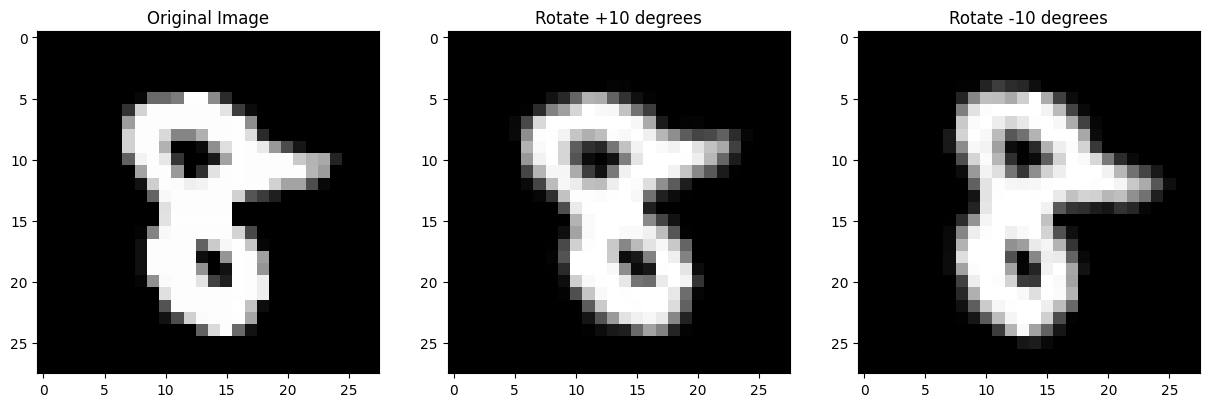

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(train_X[2], cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(rotate(train_X[2], 10), cmap="gray")
axs[1].set_title("Rotate +10 degrees")

axs[2].imshow(rotate(train_X[2], -10), cmap="gray")
axs[2].set_title("Rotate -10 degrees")

plt.show()

After rotating, the the class of the image is still the same. Let us make a function to rotate multiple images by random angles. We want a slightly different image every time we run this function. So, we generate a random number between 0 and 1 and change it so that it lies between -constraint/2 and +constraint/2

In [178]:
def augRotate(sample, angleconstraint):
    """
    This function takes in a sample and an angle constraint and returns the augmented sample
    by rotating the sample by a random angle within the angle constraint

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    angleconstraint: the maximum angle by which the sample can be rotated

    returns: the augmented sample which is the input sample rotated by a random angle within the angle constraint
    """
    if angleconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        # make sure the sample is 3 dimensional
        sample = np.expand_dims(sample, 0)
    angle = rng.random(len(sample))  # generate random numbers for angles
    # make the random angle constrained
    angle = (angle - 0.5) * angleconstraint
    nsample = sample.copy()  # preallocate the augmented array to make it faster
    for ii in range(len(sample)):
        nsample[ii] = rotate(sample[ii], angle[ii])
    return np.squeeze(nsample)  # take care if the input had only one sample.

This function returns a slightly different image each time we call it. So we can increase the number of images in the sample by any multiple.

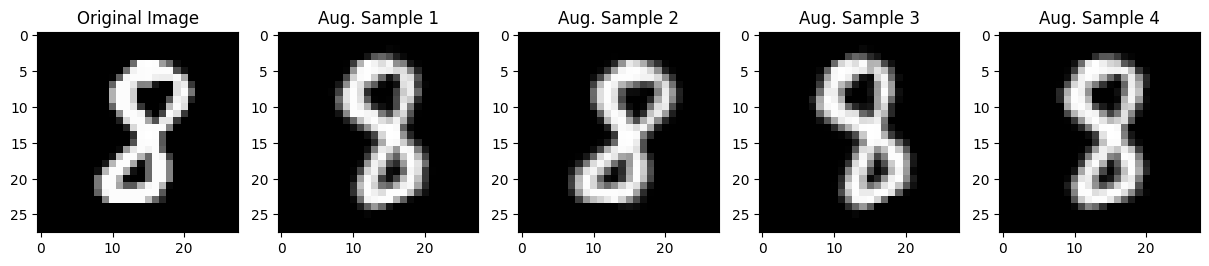

In [ ]:
sample = train_X[20]
angleconstraint = 70

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

axs[0].imshow(sample, cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[1].set_title("Aug. Sample 1")

axs[2].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[2].set_title("Aug. Sample 2")

axs[3].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[3].set_title("Aug. Sample 3")

axs[4].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[4].set_title("Aug. Sample 4")

plt.show()

Let us augment the whole dataset and see if this improves the test accuracy

In [179]:
# hyperparameters
angleconstraint = 60
naugmentations = 5

# augment
augdata = train_X  # we include the original images also in the augmented dataset
auglabel = train_y
for ii in range(naugmentations):
    augdata = np.concatenate(
        (augdata, augRotate(train_X, angleconstraint))
    )  # concatenate the augmented data to the set
    auglabel = np.concatenate(
        (auglabel, train_y)
    )  # the labels don't change when we augment

# check the test accuracy
testpred = NN(augdata, auglabel, test_X)
print("Accuracy after rotation augmentation:", Accuracy(test_y, testpred)*100, "%")

Accuracy after rotation augmentation: 67.42 %


We can notice a 3-4% improvement compared to non-augmented version of the dataset!

The angle constraint is a hyperparameter which we have to tune using a validation set. (Here we are not doing that for time constraints). Let us try a grid search to find the best angle constraint. We will try angles between 0 and 90 degrees. We can also try different multiples of the original dataset. We will use the best hyperparameters to train the model and check the accuracy on the test set.

In [180]:
angleconstraints = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]  # the values we want to test
accuracies = np.zeros(
    len(angleconstraints), dtype=float
)  # we will save the values here

for ii in range(len(angleconstraints)):
    # create the augmented dataset
    augdata = train_X  # we include the original images also in the augmented dataset
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augRotate(train_X, angleconstraints[ii]))
        )  # concatenate the augmented data to the set
        auglabel = np.concatenate(
            (auglabel, train_y)
        )  # the labels don't change when we augment

    # check the test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after rotation augmentation constrained by",
        angleconstraints[ii],
        "degrees is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after rotation augmentation constrained by 0 degrees is 64.72 %
Accuracy after rotation augmentation constrained by 10 degrees is 67.2 %
Accuracy after rotation augmentation constrained by 20 degrees is 67.08 %
Accuracy after rotation augmentation constrained by 30 degrees is 68.52000000000001 %
Accuracy after rotation augmentation constrained by 40 degrees is 68.08 %
Accuracy after rotation augmentation constrained by 50 degrees is 67.78999999999999 %
Accuracy after rotation augmentation constrained by 60 degrees is 67.28 %
Accuracy after rotation augmentation constrained by 70 degrees is 66.75999999999999 %
Accuracy after rotation augmentation constrained by 80 degrees is 65.03999999999999 %
Accuracy after rotation augmentation constrained by 90 degrees is 64.67 %


Let us see the best value for angle constraint: (Ideally this should be done on validation set, not test set)

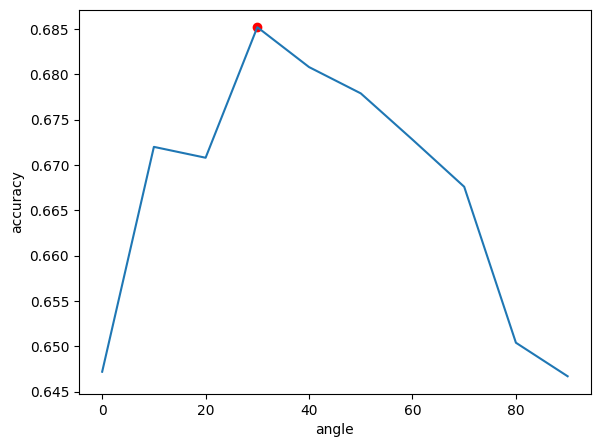

In [181]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# plot the variation of accuracy
ax.plot(angleconstraints, accuracies)
ax.set_xlabel("angle")
ax.set_ylabel("accuracy")

# plot the maximum accuracy
maxind = np.argmax(accuracies)
anglemaxconst, anglemaxacc = angleconstraints[maxind], accuracies[maxind]
plt.scatter(angleconstraints[maxind], accuracies[maxind], c="red")

### Augmentation 2: Shear


Let us try one more augmentation: shear. Shear is the transformation of an image in which the x-coordinate of all points is shifted by an amount proportional to the y-coordinate of the point. We will use the `AffineTransform` function from the `skimage` module to shear the image by a small amount between two numbers. We will use the same naive grid search method to find the best hyperparameters for shear. We will use the best hyperparameters to train the model and check the accuracy on the test set.

In [182]:
def shearit(sample, amount):
    """
    This function takes in a sample and an amount and returns the augmented sample
    by shearing the sample by the given amount

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    amount: the amount by which the sample should be sheared

    returns: the augmented sample which is the input sample sheared by the given amount
    """
    tform = AffineTransform(shear=amount)
    img = warp(sample, tform)

    # Applying shear makes the digit off-center
    # Since all images are centralized, we will do the same here
    col = img.sum(0).nonzero()[0]
    row = img.sum(1).nonzero()[0]
    if len(col) > 0 and len(row) > 0:
        xshift = int(sample.shape[0] / 2 - (row[0] + row[-1]) / 2)
        yshift = int(sample.shape[1] / 2 - (col[0] + col[-1]) / 2)
        img = np.roll(img, (xshift, yshift), (0, 1))
    return img

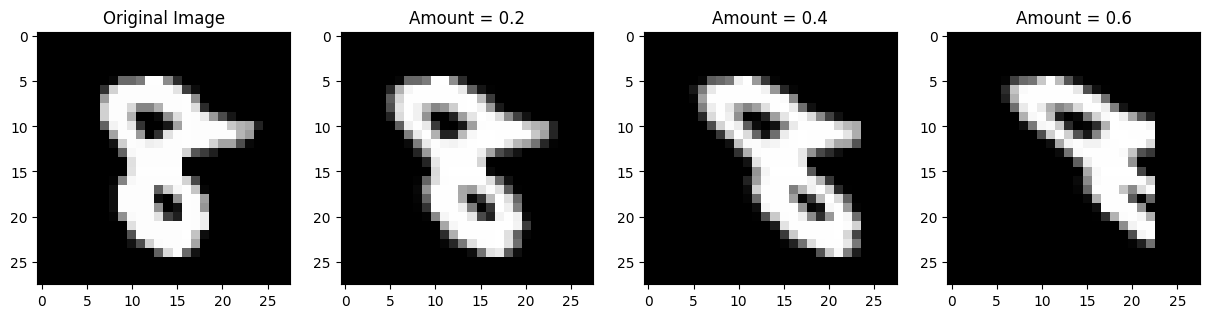

In [ ]:
sample = train_X[2]
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(sample, cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(shearit(sample, 0.2), cmap="gray")
axs[1].set_title("Amount = 0.2")

axs[2].imshow(shearit(sample, 0.4), cmap="gray")
axs[2].set_title("Amount = 0.4")

axs[3].imshow(shearit(sample, 0.6), cmap="gray")
axs[3].set_title("Amount = 0.6")

plt.show()

Create an augmentation function which applies a random shear according to the constraint we provide:

In [183]:
def augShear(sample, shearconstraint):
    """
    This function takes in a sample and a shear constraint and returns the augmented sample
    by shearing the sample by a random amount within the shear constraint

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    shearconstraint: the maximum shear by which the sample can be sheared

    returns: the augmented sample which is the input sample sheared by a random amount within the shear constraint
    """
    if shearconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        # make sure the sample is 3 dimensional
        sample = np.expand_dims(sample, 0)
    amt = rng.random(len(sample))  # generate random numbers for shear
    amt = (amt - 0.5) * shearconstraint  # make the random shear constrained
    nsample = sample.copy()  # preallocate the augmented array to make it faster
    for ii in range(len(sample)):
        nsample[ii] = shearit(sample[ii], amt[ii])
    return np.squeeze(nsample)  # take care if the input had only one sample.

Let us do a grid search to find the best shear constraint.

In [185]:
shearconstraints = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0,]  # the values we want to test
accuracies = np.zeros(
    len(shearconstraints), dtype=float
)  # we will save the values here

for ii in range(len(shearconstraints)):
    # create the augmented dataset
    augdata = train_X  # we include the original images also in the augmented dataset
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augShear(train_X, shearconstraints[ii]))
        )  # concatenate the augmented data to the set
        auglabel = np.concatenate(
            (auglabel, train_y)
        )  # the labels don't change when we augment

    # check the test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after shear augmentation constrained by",
        shearconstraints[ii],
        "is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after shear augmentation constrained by 0 is 64.72 %
Accuracy after shear augmentation constrained by 0.2 is 62.96000000000001 %
Accuracy after shear augmentation constrained by 0.4 is 64.46 %
Accuracy after shear augmentation constrained by 0.6 is 65.56 %
Accuracy after shear augmentation constrained by 0.8 is 65.45 %
Accuracy after shear augmentation constrained by 1.0 is 65.71000000000001 %
Accuracy after shear augmentation constrained by 1.2 is 64.36 %
Accuracy after shear augmentation constrained by 1.4 is 63.32 %
Accuracy after shear augmentation constrained by 1.6 is 61.41 %
Accuracy after shear augmentation constrained by 1.8 is 63.129999999999995 %
Accuracy after shear augmentation constrained by 2.0 is 65.11 %


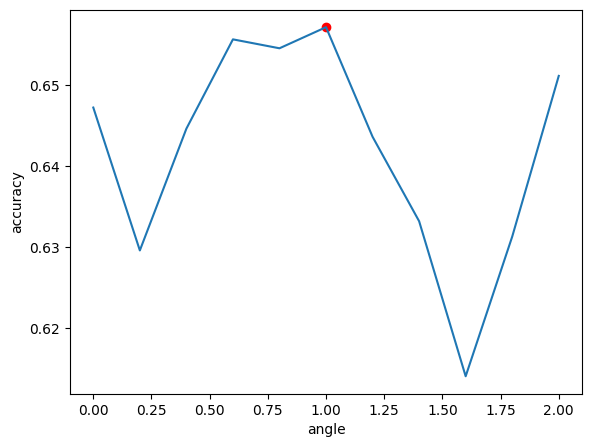

In [186]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# plot the variation of accuracy
ax.plot(shearconstraints, accuracies)
ax.set_xlabel("angle")
ax.set_ylabel("accuracy")

# plot the maximum accuracy
maxind = np.argmax(accuracies)
shearmaxconst, shearmaxacc = shearconstraints[maxind], accuracies[maxind]
plt.scatter(shearconstraints[maxind], accuracies[maxind], c="red")

### Augmentation 3: Rotation + Shear



We can do multiple augmentations at the same time. Here is a function to do both shear and rotation to the sample. In this case, we will have two hyperparameters.

In [187]:
def augRotateShear(sample, angleconstraint, shearconstraint):
    """
    This function takes in a sample, an angle constraint and a shear constraint and returns the augmented sample
    by rotating the sample by a random angle within the angle constraint and shearing the sample by a random amount within the shear constraint

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    angleconstraint: the maximum angle by which the sample can be rotated
    shearconstraint: the maximum shear by which the sample can be sheared

    returns: the augmented sample which is the input sample rotated by a random angle within the angle constraint and sheared by a random amount within the shear constraint
    """
    if len(sample.shape) == 2:
        # make sure the sample is 3 dimensional
        sample = np.expand_dims(sample, 0)
    amt = rng.random(len(sample))  # generate random numbers for shear
    amt = (amt - 0.5) * shearconstraint  # make the random shear constrained
    angle = rng.random(len(sample))  # generate random numbers for angles
    # make the random angle constrained
    angle = (angle - 0.5) * angleconstraint
    nsample = sample.copy()  # preallocate the augmented array to make it faster
    for ii in range(len(sample)):
        nsample[ii] = rotate(
            shearit(sample[ii], amt[ii]), angle[ii]
        )  # first apply shear, then rotate
    return np.squeeze(nsample)  # take care if the input had only one sample.

Since we have two hyperparameters, we have to do the grid search on a 2 dimensional matrix. We can use our previous experience to inform where to search for the best hyperparameters.

In [188]:
shearconstraints = [
    0,
    0.2,
    0.4,
    0.6,
    0.8,
    1.0,
    1.2,
    1.4,
    1.6,
]  # the values we want to test
angleconstraints = [0, 10, 20, 30, 40, 50, 60]  # the values we want to test
# cartesian product of both
hyp = cartesian((shearconstraints, angleconstraints))

accuracies = np.zeros(len(hyp), dtype=float)  # we will save the values here

for ii in range(len(hyp)):
    # create the augmented dataset
    augdata = train_X  # we include the original images also in the augmented dataset
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1]))
        )  # concatenate the augmented data to the set
        auglabel = np.concatenate(
            (auglabel, train_y)
        )  # the labels don't change when we augment

    # check the test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after augmentation shear:",
        hyp[ii][0],
        "angle:",
        hyp[ii][1],
        "is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after augmentation shear: 0.0 angle: 0.0 is 63.32 %
Accuracy after augmentation shear: 0.0 angle: 10.0 is 64.88000000000001 %
Accuracy after augmentation shear: 0.0 angle: 20.0 is 62.89 %
Accuracy after augmentation shear: 0.0 angle: 30.0 is 64.32 %
Accuracy after augmentation shear: 0.0 angle: 40.0 is 63.31 %
Accuracy after augmentation shear: 0.0 angle: 50.0 is 61.550000000000004 %
Accuracy after augmentation shear: 0.0 angle: 60.0 is 60.31999999999999 %
Accuracy after augmentation shear: 0.2 angle: 0.0 is 63.339999999999996 %
Accuracy after augmentation shear: 0.2 angle: 10.0 is 62.22 %
Accuracy after augmentation shear: 0.2 angle: 20.0 is 62.260000000000005 %
Accuracy after augmentation shear: 0.2 angle: 30.0 is 61.14000000000001 %
Accuracy after augmentation shear: 0.2 angle: 40.0 is 63.28 %
Accuracy after augmentation shear: 0.2 angle: 50.0 is 62.56 %
Accuracy after augmentation shear: 0.2 angle: 60.0 is 62.38 %
Accuracy after augmentation shear: 0.4 angle: 0.0 is 63.349

Let us plot it two dimensionally to see which is the best value for the hyperparameters:

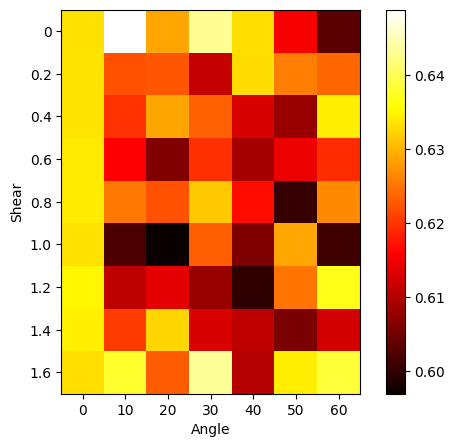

In [189]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax.imshow(
    accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap="hot"
)
ax.set_xlabel("Angle")
ax.set_ylabel("Shear")
ax.set_xticks(np.arange(len(angleconstraints)))
ax.set_xticklabels(angleconstraints)
ax.set_yticks(np.arange(len(shearconstraints)))
ax.set_yticklabels(shearconstraints)
plt.colorbar(im)

It seems that rotation and shear don't mix! The best accuracy is when rotation is zero.

## Questions
Try these questions for better understanding. You may not be able to solve all of them.
1. What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?


In [190]:
print("Best Shear Constraint : ", shearmaxconst, "Accuracy : ", shearmaxacc*100,"%  Accuracy Increased by : ", (shearmaxacc - base)*100,"%")
print("Best Angle Constraint : ", anglemaxconst, "Accuracy : ", anglemaxacc*100,"%  Accuracy Increased by : ", (anglemaxacc - base)*100,"%")

Best Shear Constraint :  1.0 Accuracy :  65.71000000000001 %  Accuracy Increased by :  0.990000000000002 %
Best Angle Constraint :  30 Accuracy :  68.52000000000001 %  Accuracy Increased by :  3.8000000000000034 %


2. Can you increase the accuracy by increasing the number of augmentations from each sample?


In [ ]:
angleconstraint = 60
naugmentations = 5

augdata = train_X
auglabel = train_y
for ii in range(naugmentations):
    augdata = np.concatenate(
        (augdata, augRotate(train_X, angleconstraint))
    )
    auglabel = np.concatenate(
        (auglabel, train_y)
    )

testpred = NN(augdata, auglabel, test_X)
print("Accuracy after 5 rotation augmentations:", Accuracy(test_y, testpred)*100, "%")

naugmentations = 20
for ii in range(naugmentations):
    augdata = np.concatenate(
        (augdata, augRotate(train_X, angleconstraint))
    )
    auglabel = np.concatenate(
        (auglabel, train_y)
    )

testpred = NN(augdata, auglabel, test_X)
print("Accuracy after 20 rotation augmentations:", Accuracy(test_y, testpred)*100, "%")

Accuracy after 5 rotation augmentations: 66.64 %
Accuracy after 20 rotation augmentations: 67.77 %


3. Try implementing a few augmentations of your own and experimenting with them. A good reference is <a href=https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/>here. </a>


In [ ]:
def augFlip(sample, flip_type="horizontal"):
    """
    This function takes in a sample and a flip type and returns the augmented sample
    by flipping the sample either horizontally or vertically.

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    flip_type: specifies the type of flip ('horizontal' or 'vertical')

    returns: the augmented sample which is the input sample flipped as per the specified type
    """
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)  # Ensure the sample is 3D

    nsample = sample.copy()  # Preallocate the augmented array
    for ii in range(len(sample)):
        if flip_type == "horizontal":
            nsample[ii] = np.fliplr(sample[ii])
        elif flip_type == "vertical":
            nsample[ii] = np.flipud(sample[ii])
    return np.squeeze(nsample)

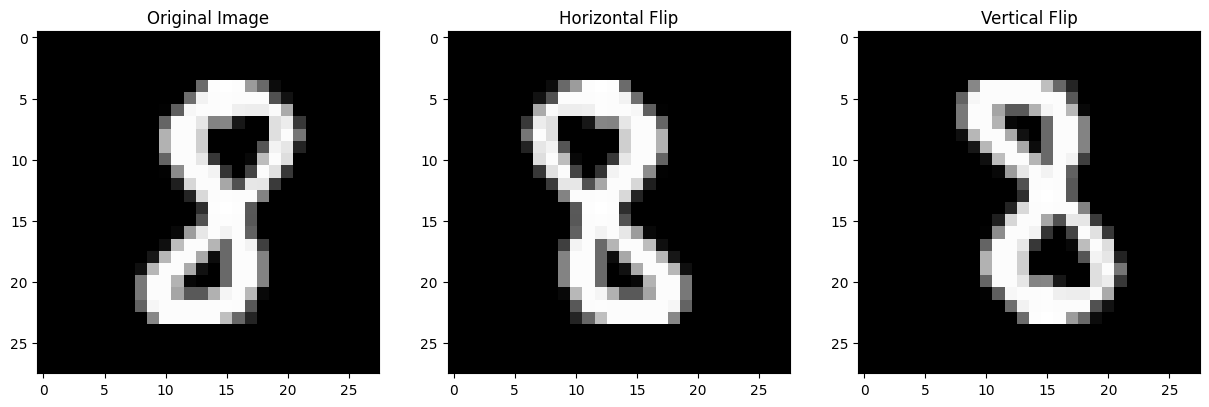

In [ ]:
sample = train_X[20]

# Display original image and flipped images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
axs[0].imshow(sample, cmap="gray")
axs[0].set_title("Original Image")

# Horizontal Flip
axs[1].imshow(augFlip(sample, flip_type="horizontal"), cmap="gray")
axs[1].set_title("Horizontal Flip")

# Vertical Flip
axs[2].imshow(augFlip(sample, flip_type="vertical"), cmap="gray")
axs[2].set_title("Vertical Flip")

plt.show()

In [ ]:
naugmentations = 5  # Number of augmentations

flip_types = ["horizontal", "vertical"]
accuracies = []

for flip_type in flip_types:
    # Create augmented dataset with flip augmentation
    augdata = train_X  # Include original images
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate((augdata, augFlip(train_X, flip_type)))
        auglabel = np.concatenate((auglabel, train_y))

    # Check test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracy = Accuracy(test_y, testpred)
    accuracies.append(accuracy)
    print(f"Accuracy after {flip_type} flip augmentation: {accuracy * 100:.2f} %")

Accuracy after horizontal flip augmentation: 62.38 %
Accuracy after vertical flip augmentation: 61.75 %


4. Try combining various augmentations. What is the highest accuracy you can get?

What is the smallest training dataset you can take and still get accuracy above 50%? -> have to solve

Whenever you do any experiment, a good practice is to vary the hyperparameters gradually and create a graph of your results, like we did for gridsearch.

In [ ]:
from itertools import product
def augRotateShearFlip(samples, shearconstraint, angleconstraint, flip='horizontal'):
    """
    Applies shear, rotation, and specified flip to each sample.
    """
    augmented_samples = []
    for sample in samples:
        aug_sample = augShear(sample, shearconstraint)
        aug_sample = augRotate(aug_sample, angleconstraint)
        aug_sample = augFlip(aug_sample, flip)
        augmented_samples.append(aug_sample)
    return np.array(augmented_samples)

# Define shear, angle constraints, and flip options
shearconstraints = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]
angleconstraints = [0, 10, 20, 30, 40, 50, 60]
flipoptions = [None, 'horizontal', 'vertical']

# Cartesian product of all three parameters
hyp = list(product(shearconstraints, angleconstraints, flipoptions))
accuracies = np.zeros(len(hyp), dtype=float)

for ii, (shear, angle, flip) in enumerate(hyp):
    # Create the augmented dataset
    augdata = train_X  # Include the original images also in the augmented dataset
    auglabel = train_y
    for _ in range(naugmentations):
        # Apply the combined augmentation
        aug_samples = augRotateShearFlip(train_X, shear, angle, flip)
        augdata = np.concatenate((augdata, aug_samples))
        auglabel = np.concatenate((auglabel, train_y))

    # Check the test accuracy (using a function NN to evaluate)
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        f"Accuracy with shear: {shear}, angle: {angle}, flip: {flip} is {accuracies[ii]*100:.2f}%",
        flush=True,
    )

Accuracy with shear: 0, angle: 0, flip: None is 64.72%
Accuracy with shear: 0, angle: 0, flip: horizontal is 62.38%
Accuracy with shear: 0, angle: 0, flip: vertical is 62.38%
Accuracy with shear: 0, angle: 10, flip: None is 67.48%
Accuracy with shear: 0, angle: 10, flip: horizontal is 59.19%
Accuracy with shear: 0, angle: 10, flip: vertical is 58.68%
Accuracy with shear: 0, angle: 20, flip: None is 68.15%
Accuracy with shear: 0, angle: 20, flip: horizontal is 57.96%
Accuracy with shear: 0, angle: 20, flip: vertical is 57.90%
Accuracy with shear: 0, angle: 30, flip: None is 68.92%
Accuracy with shear: 0, angle: 30, flip: horizontal is 57.90%
Accuracy with shear: 0, angle: 30, flip: vertical is 57.43%
Accuracy with shear: 0, angle: 40, flip: None is 68.29%
Accuracy with shear: 0, angle: 40, flip: horizontal is 57.33%
Accuracy with shear: 0, angle: 40, flip: vertical is 57.08%
Accuracy with shear: 0, angle: 50, flip: None is 67.20%
Accuracy with shear: 0, angle: 50, flip: horizontal is 56

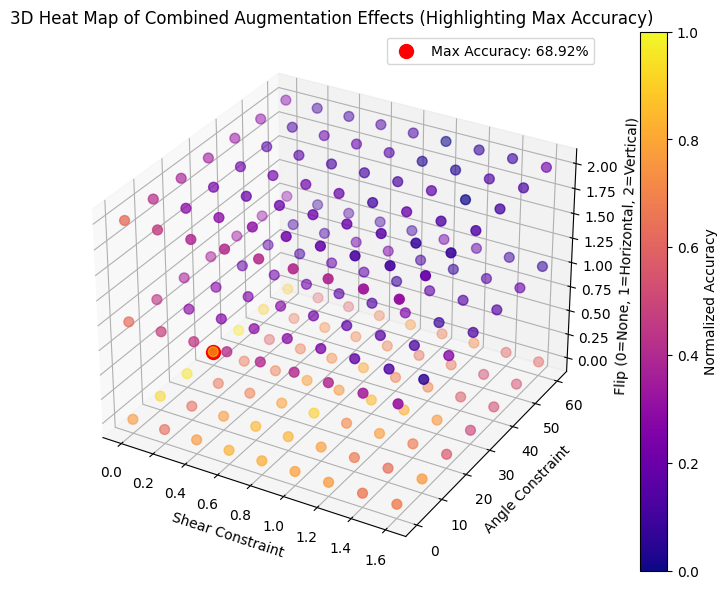

In [ ]:
# Extract data for 3D plotting
shear_vals = np.array([x[0] for x in hyp])
angle_vals = np.array([x[1] for x in hyp])
flip_vals = np.array([0 if x[2] is None else (1 if x[2] == 'horizontal' else 2) for x in hyp])

# Normalize the accuracy values for coloring
norm_accuracies = (accuracies - accuracies.min()) / (accuracies.max() - accuracies.min())

# Identify the index of the maximum accuracy
max_index = np.argmax(accuracies)
max_shear = shear_vals[max_index]
max_angle = angle_vals[max_index]
max_flip = flip_vals[max_index]
max_accuracy = accuracies[max_index]

# Creating a 3D heat map plot with more contrasting colors and marking max accuracy
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Use a contrasting colormap like 'plasma' or 'coolwarm'
sc = ax.scatter(shear_vals, angle_vals, flip_vals, c=norm_accuracies, cmap='plasma', s=50)
ax.set_xlabel("Shear Constraint")
ax.set_ylabel("Angle Constraint")
ax.set_zlabel("Flip (0=None, 1=Horizontal, 2=Vertical)")

# Highlight the maximum accuracy point
ax.scatter(max_shear, max_angle, max_flip, color='red', s=100, label=f"Max Accuracy: {max_accuracy*100:.2f}%")
ax.legend()

# Adding color bar to indicate accuracy levels
cbar = fig.colorbar(sc)
cbar.set_label('Normalized Accuracy')

plt.title("3D Heat Map of Combined Augmentation Effects (Highlighting Max Accuracy)")
plt.show()

> Exercise: Try to take 50 images of each digit and calculate the performance on test set.

In [149]:
naugmentations = 5
angleconstraint = 30
def sample_50_images_per_digit(train_X, train_y):
    unique_digits = np.unique(train_y)
    sampled_X, sampled_y = [], []
    for digit in unique_digits:
        indices = np.where(train_y == digit)[0]
        if len(indices) >= 50:
            # If we have enough samples, select 50 without replacement
            selected_indices = np.random.choice(indices, 50, replace=False)
        else:
            # If not enough samples, sample with replacement to reach 50
            selected_indices = np.random.choice(indices, 50, replace=True)

        sampled_X.append(train_X[selected_indices])
        sampled_y.append(train_y[selected_indices])
    return np.concatenate(sampled_X), np.concatenate(sampled_y)

# Sample exactly 50 images per digit
balanced_train_X, balanced_train_y = sample_50_images_per_digit(train_X, train_y)

# Augment the dataset (using already-defined hyperparameters and functions)
augdata = balanced_train_X
auglabel = balanced_train_y

for _ in range(naugmentations):
    augdata = np.concatenate((augdata, augRotate(balanced_train_X, angleconstraint)))
    auglabel = np.concatenate((auglabel, balanced_train_y))

# Calculate performance on the test set
testpred = NN(augdata, auglabel, test_X)
print("Accuracy after rotation augmentation with 50 images per digit:", Accuracy(test_y, testpred) * 100, "%")



Accuracy after rotation augmentation with 50 images per digit: 68.99 %
